In [82]:
#!pip install numpy pandas matplotlib seaborn sklearn lightgbm xgboost catboost

In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error,mean_squared_log_error, r2_score,mean_absolute_percentage_error

In [84]:
data = pd.read_csv("car.csv")
data.head()

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
0,ritz,2014,5.59,27000,Petrol,Dealer,Manual,0,3.35
1,sx4,2013,9.54,43000,Diesel,Dealer,Manual,0,4.75
2,ciaz,2017,9.85,6900,Petrol,Dealer,Manual,0,7.25
3,wagon r,2011,4.15,5200,Petrol,Dealer,Manual,0,2.85
4,swift,2014,6.87,42450,Diesel,Dealer,Manual,0,4.60


#### Basic EDA

In [85]:
# Check the shape of data
data.shape

(301, 9)

In [86]:
# Check column names of the data
data.columns

Index(['Car_Name', 'Year', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner', 'Selling_Price'],
      dtype='object')

In [87]:
# Check for missing values
data.isnull().sum()

Car_Name         0
Year             0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
Selling_Price    0
dtype: int64

In [88]:
# check for the datatypes amd other info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Present_Price  301 non-null    float64
 3   Kms_Driven     301 non-null    int64  
 4   Fuel_Type      301 non-null    object 
 5   Seller_Type    301 non-null    object 
 6   Transmission   301 non-null    object 
 7   Owner          301 non-null    int64  
 8   Selling_Price  301 non-null    float64
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [89]:
# check the statistics of data
print(data.describe())

              Year  Present_Price     Kms_Driven       Owner  Selling_Price
count   301.000000     301.000000     301.000000  301.000000     301.000000
mean   2013.627907       7.628472   36947.205980    0.043189       4.661296
std       2.891554       8.644115   38886.883882    0.247915       5.082812
min    2003.000000       0.320000     500.000000    0.000000       0.100000
25%    2012.000000       1.200000   15000.000000    0.000000       0.900000
50%    2014.000000       6.400000   32000.000000    0.000000       3.600000
75%    2016.000000       9.900000   48767.000000    0.000000       6.000000
max    2018.000000      92.600000  500000.000000    3.000000      35.000000


In [124]:
# lets see the Correlation between the features
print(data.corr())

                   Year  Kms_Driven  Present_Price  Fuel_Type  Transmission  \
Year           1.000000   -0.524342      -0.047584  -0.053643      0.000394   
Kms_Driven    -0.524342    1.000000       0.203647  -0.166801     -0.162510   
Present_Price -0.047584    0.203647       1.000000  -0.440415     -0.348715   
Fuel_Type     -0.053643   -0.166801      -0.440415   1.000000      0.080466   
Transmission   0.000394   -0.162510      -0.348715   0.080466      1.000000   
Owner         -0.182104    0.089216       0.008057   0.055705     -0.050316   
Selling_Price  0.236141    0.029187       0.878983  -0.509467     -0.367128   

                  Owner  Selling_Price  
Year          -0.182104       0.236141  
Kms_Driven     0.089216       0.029187  
Present_Price  0.008057       0.878983  
Fuel_Type      0.055705      -0.509467  
Transmission  -0.050316      -0.367128  
Owner          1.000000      -0.088344  
Selling_Price -0.088344       1.000000  


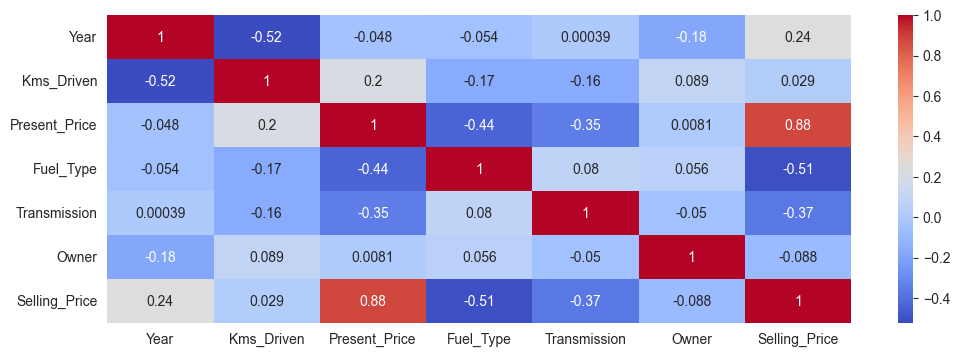

In [125]:
# Plot the heatmap
plt.figure(figsize=(12, 4))
correlations = data.corr()
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.show()

#### Basic Preprocessing

In [128]:
# Lets encode the text features using Label Encoding
le = LabelEncoder()
data['Fuel_Type'] = le.fit_transform(data.Fuel_Type.values)
data['Transmission'] = le.fit_transform(data.Transmission.values)
data.head()

,Year,Kms_Driven,Present_Price,Fuel_Type,Transmission,Owner,Selling_Price
0,2014,27000,5.59,2,1,0,3.35
1,2013,43000,9.54,1,1,0,4.75
2,2017,6900,9.85,2,1,0,7.25
3,2011,5200,4.15,2,1,0,2.85
4,2014,42450,6.87,1,1,0,4.60


In [97]:
#Petrol=2, Diesel=1, CNG=0
data.Fuel_Type.unique()

array([2, 1, 0])

In [98]:
#Manual=1, Automatic=0
data.Transmission.unique()

array([1, 0])

In [99]:
#First=0, Second=1, Fourth=3
data.Owner.unique()

array([0, 1, 3], dtype=int64)

In [129]:
# Target column is Selling Price
predict = "Selling_Price"
data = data[["Year", "Kms_Driven", 
             "Present_Price", "Fuel_Type", "Transmission", 
             "Owner", "Selling_Price"]]

In [130]:
# Split dataset into input (other than selling price) and output (Selling Price)
x = np.array(data.drop([predict], 1))
y = np.array(data[predict])

C:\Users\Administrator\AppData\Local\Temp\ipykernel_13068\757806913.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = np.array(data.drop([predict], 1))


In [131]:
# Now split data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#### Model Building

In [132]:
# Train all 7 models on x_train and y_train
lrmodel=LinearRegression().fit(x_train,y_train)
dt_model = DecisionTreeRegressor().fit(x_train,y_train)
rf_model=RandomForestRegressor().fit(x_train,y_train)
gbm_model=GradientBoostingRegressor().fit(x_train,y_train)
lgbm_model=LGBMRegressor().fit(x_train,y_train)
xgb_model= XGBRegressor().fit(x_train,y_train)
catb_model= CatBoostRegressor().fit(x_train,y_train)

Learning rate set to 0.032678
0:	learn: 4.7514146	total: 1.27ms	remaining: 1.27s
1:	learn: 4.6659730	total: 2.7ms	remaining: 1.34s
2:	learn: 4.5713572	total: 4.35ms	remaining: 1.44s
3:	learn: 4.4936298	total: 6ms	remaining: 1.49s
4:	learn: 4.4038157	total: 7.42ms	remaining: 1.48s
5:	learn: 4.3405698	total: 8.73ms	remaining: 1.45s
6:	learn: 4.2738109	total: 11.4ms	remaining: 1.61s
7:	learn: 4.2000054	total: 13.6ms	remaining: 1.68s
8:	learn: 4.1209715	total: 15ms	remaining: 1.65s
9:	learn: 4.0372070	total: 16.4ms	remaining: 1.63s
10:	learn: 3.9611747	total: 17.8ms	remaining: 1.6s
11:	learn: 3.8936750	total: 19.4ms	remaining: 1.6s
12:	learn: 3.8284401	total: 21.3ms	remaining: 1.62s
13:	learn: 3.7480613	total: 22.8ms	remaining: 1.6s
14:	learn: 3.6805975	total: 24.1ms	remaining: 1.58s
15:	learn: 3.6220077	total: 27ms	remaining: 1.66s
16:	learn: 3.5583110	total: 28.9ms	remaining: 1.67s
17:	learn: 3.4941733	total: 30.4ms	remaining: 1.66s
18:	learn: 3.4257499	total: 31.3ms	remaining: 1.61s
19:

#### Evaluating Models

In [133]:
# define function to evaluate all these 7 models
def evaluate_model(model,x_test,y_test):
    prediction=model.predict(x_test)
    print("Mean Absolute Error:",mean_absolute_error(y_test,prediction))
    print("Mean Absolute Percentage Error:",mean_absolute_percentage_error(y_test,prediction))
    print("Mean Squared Error:",mean_squared_error(y_test,prediction))
    print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,prediction)))
    print("R2 Score:",r2_score(y_test,prediction))

In [134]:
# Lets evaluate these 7 models and see the results
print("LR_Model:")
print(evaluate_model(lrmodel,x_test,y_test))
print()
print("DT_Model:")
print(evaluate_model(dt_model,x_test,y_test))
print()
print("RF_Model:")
print(evaluate_model(rf_model,x_test,y_test))
print()
print("GBM_Model:")
print(evaluate_model(gbm_model,x_test,y_test))
print()
print("LGBM_Model:")
print(evaluate_model(lgbm_model,x_test,y_test))
print()
print("XGB_Model:")
print(evaluate_model(xgb_model,x_test,y_test))
print()
print("CatBoost_Model:")
print(evaluate_model(catb_model,x_test,y_test))

LR_Model:
Mean Absolute Error: 1.4930350588750168
Mean Absolute Percentage Error: 0.8828499100595787
Mean Squared Error: 5.059295334440833
Root Mean Squared Error: 2.249287739361248
R2 Score: 0.8470545439589046
None

DT_Model:
Mean Absolute Error: 2.1631147540983613
Mean Absolute Percentage Error: 0.2501144435699509
Mean Squared Error: 27.21242459016394
Root Mean Squared Error: 5.216552941374595
R2 Score: 0.177352494013568
None

RF_Model:
Mean Absolute Error: 1.2332655737704914
Mean Absolute Percentage Error: 0.17138970071697088
Mean Squared Error: 6.919942475081961
Root Mean Squared Error: 2.630578353724131
R2 Score: 0.7908060930096836
None

GBM_Model:
Mean Absolute Error: 1.288208669623182
Mean Absolute Percentage Error: 0.1812698826446411
Mean Squared Error: 7.310528114805312
Root Mean Squared Error: 2.7037988303136222
R2 Score: 0.7789984607522967
None

LGBM_Model:
Mean Absolute Error: 1.4785932782250966
Mean Absolute Percentage Error: 0.40219869119588564
Mean Squared Error: 7.76291

#### Predictions

In [138]:
# From above result, as r2 is comparitely high in CatBoost Model,
# so we will finalize this model, also now Lets do the prediction for x_test data
predictions = catb_model.predict(x_test)
predictions


array([ 5.20330881,  6.63367571,  9.20306816,  5.95541153,  5.37790818,
        2.91319367,  0.27597072,  0.70094158,  4.15671561,  0.96459733,
        6.19145016,  4.53631973, 15.20504224, 10.27988313,  9.32271389,
        4.26425608,  8.97754861,  3.74562141,  7.13780476,  1.11625903,
        0.46254417,  8.48472165,  0.0926486 , 16.98162339,  0.39424754,
        0.21555599,  5.57146812,  8.64804719,  2.94846369, 13.07778316,
       17.07167236,  1.16623092,  0.60227759,  9.44062972,  1.29081566,
        3.60804189,  5.10675438,  4.28995315,  5.64650337,  1.51576405,
        7.55235797,  2.89724484,  3.95893548,  3.75977314,  1.11296908,
        3.24278847, 19.58902427, 12.98272162,  5.69203819,  6.57554809,
       22.4638329 ,  2.83812837, 16.89425416,  1.40587255,  3.6066564 ,
        3.29648327,  5.62002538,  0.41651924,  3.73654043,  3.25399784,
        4.15171383])

In [136]:
# Let's do the prediction new unknown data
input=[[2016,30000,6.87,1,1,0,0]]
price = catb_model.predict(input)
print(price.round(1)[0],"in Lakhs")

5.8 in Lakhs


#### Saving Models

In [137]:
# Save the model in pickle file
import pickle
pickle.dump(catb_model,open("car_price_predictor_model.pkl","wb"))